<a href="https://colab.research.google.com/github/ivancloudvm/Data-Science-Notebooks/blob/main/Red_wine_qual_comp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
 ! pip install -q kaggle
 ! mkdir ~/.kaggle
 ! cp kaggle.json ~/.kaggle/
 ! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list



mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              229KB  2021-05-15 08:36:45           5288  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           2921  
mathurinache/twitter-edge-nodes                             Twitter Edge Nodes                                342MB  2021-03-08 06:43:04            334  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27           1766  
imsparsh/musicne

In [42]:
#! kaggle competitions download -c 'red-wine-quality'

ivancloudvm@gmail.com

# Red Wine Quality Competition

# Import libraries

In [43]:
# Data wrangling
import pandas as pd
import numpy as np
from collections import Counter
import datetime as dt
import re

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Machine learning models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

#Cluster model
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Model evaluation
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [44]:
data = pd.read_csv("/content/drive/MyDrive/Datos_CSV/Red_wine_quality_comp/winequality-red.csv")

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Preprocessing

In [45]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [46]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [47]:
data.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [48]:
y = data.quality
X = data.drop("quality", axis = 1)

y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [49]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [50]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X),columns= X.columns)

In [51]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


# Clustering

In [52]:
kmeans = KMeans(n_clusters= 6)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [53]:
clusters = kmeans.predict(X)
clusters

array([1, 1, 1, ..., 0, 1, 0], dtype=int32)

# Vizualization

In [54]:
pca = PCA(n_components= 2)

reduced_X = pd.DataFrame(pca.fit_transform(X), columns= ["PC1", "PC2"])
reduced_X['Cluster'] = clusters
reduced_X.head()

,PC1,PC2,Cluster
0,-1.619530,0.450950,1
1,-0.799170,1.856553,1
2,-0.748479,0.882039,1
3,2.357673,-0.269976,4
4,-1.619530,0.450950,1


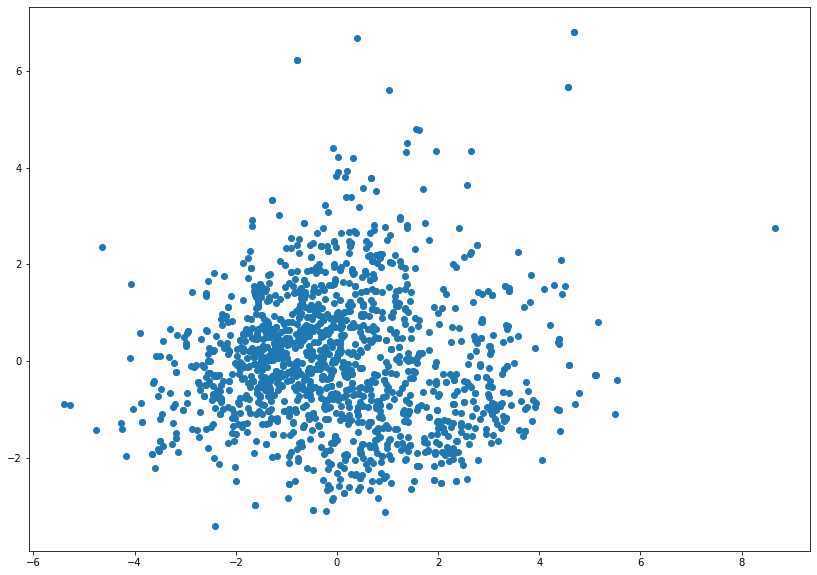

In [55]:
plt.figure(figsize=(14,10))
plt.scatter(reduced_X["PC1"], reduced_X["PC2"])
plt.show()

In [56]:
reduced_centers = pca.transform(kmeans.cluster_centers_)

reduced_centers

array([[-1.28148757, -1.05526621],
       [-1.09551673,  0.00982351],
       [ 1.58571538,  3.62081388],
       [ 3.52834398,  1.01049765],
       [ 2.10942083, -0.98427426],
       [ 0.13471082,  1.46893535]])

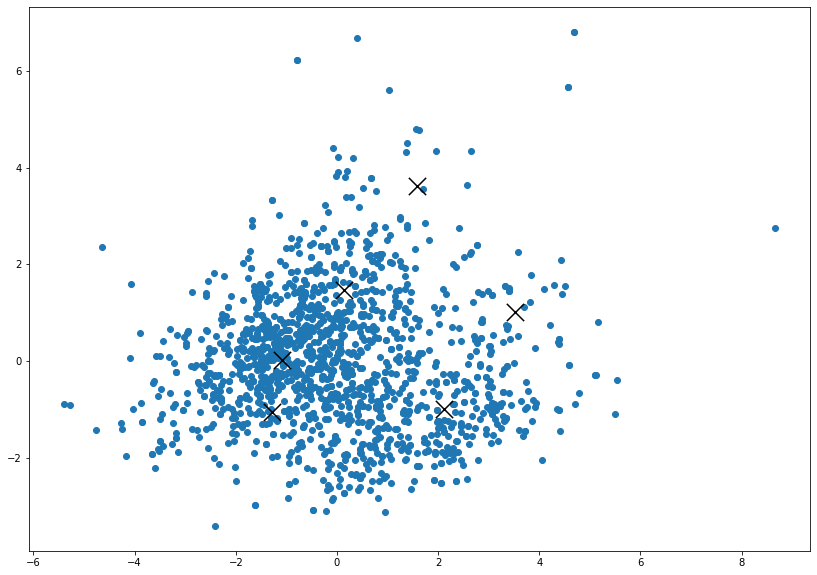

In [57]:
plt.figure(figsize=(14,10))
plt.scatter(reduced_X["PC1"], reduced_X["PC2"])

plt.scatter(reduced_centers[:,0], reduced_centers[:,1],color = "black", marker= "x", s = 300)
plt.show()

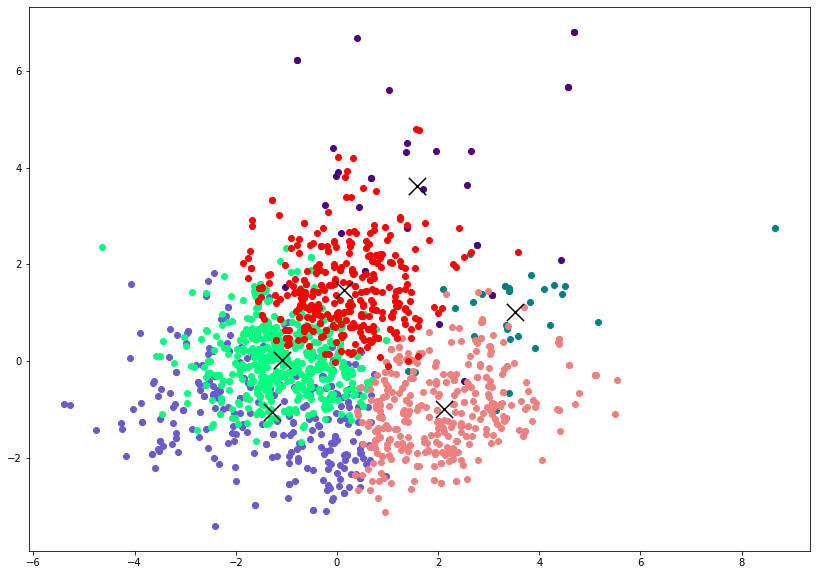

In [59]:
plt.figure(figsize=(14,10))

plt.scatter(reduced_X[reduced_X["Cluster"] == 0].loc[:,'PC1'], reduced_X[reduced_X["Cluster"] == 0].loc[:,'PC2'],color = 'slateblue')
plt.scatter(reduced_X[reduced_X["Cluster"] == 1].loc[:,'PC1'], reduced_X[reduced_X["Cluster"] == 1].loc[:,'PC2'],color = 'springgreen')
plt.scatter(reduced_X[reduced_X["Cluster"] == 2].loc[:,'PC1'], reduced_X[reduced_X["Cluster"] == 2].loc[:,'PC2'],color = 'indigo')
plt.scatter(reduced_X[reduced_X["Cluster"] == 3].loc[:,'PC1'], reduced_X[reduced_X["Cluster"] == 3].loc[:,'PC2'],color = 'teal')
plt.scatter(reduced_X[reduced_X["Cluster"] == 4].loc[:,'PC1'], reduced_X[reduced_X["Cluster"] == 4].loc[:,'PC2'],color = 'lightcoral')
plt.scatter(reduced_X[reduced_X["Cluster"] == 5].loc[:,'PC1'], reduced_X[reduced_X["Cluster"] == 5].loc[:,'PC2'],color = 'red')

plt.scatter(reduced_centers[:,0], reduced_centers[:,1],color = "black", marker= "x", s = 300)
plt.show()

# Training

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8 ,random_state = 1)

In [64]:
model = MLPClassifier(hidden_layer_sizes=(256,256), max_iter= 500)
model.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(256, 256), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [65]:
print(f"Model Accuracy: {model.score(X_test,y_test)}")

Model Accuracy: 0.634375
